In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import scipy.stats as st
import itertools
import math
from collections import Counter, defaultdict
%load_ext autoreload
%autoreload 2

In [2]:
import nltk
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [7]:
import matplotlib.pylab as plt
import matplotlib as mpl
plt.rcParams['figure.figsize'] = (12.0, 6.0)
#%matplotlib notebook
%matplotlib inline
%load_ext base16_mplrc
%base16_mplrc light default

The base16_mplrc extension is already loaded. To reload it, use:
  %reload_ext base16_mplrc
Setting plotting theme to default-light. Palette available in b16_colors


In [51]:
import cPickle as pickle
from fuzzywuzzy import fuzz, process

## Seperating individual ingredients

I need to-
take out common connective words
lower
remove punct?

In [10]:
ing_words = word_tokenize(ingredient_bow)

## ingredient words

In [8]:
with open('./data/recipes.pkl', 'r') as f:
    recipe_raw = pickle.load(f)

In [9]:
recipe_comb = {}
for f in recipe_raw:
    recipe_comb.update(f)

In [10]:
cocktail_ing_lists = recipe_comb.values()
cocktail_ing_bow = [ing[0].lower() for ing in cocktail_ing_lists]
len(set(cocktail_ing_bow))

303

In [34]:
raw_flav_ing['ISOBUTYL BUTYRATE']

['banana',
 'apple',
 'strawberry',
 'cognac',
 'rum',
 'honey',
 'olive',
 'passion fruit',
 'plum',
 'beans',
 'mushrooms',
 'mango',
 'apple brandy',
 'quince',
 'cherimoya']

In [21]:
with open('./data/second_ing_flav_dict.pkl', 'r') as f:
    comp_ing_dict = pickle.load(f)

In [43]:
fen_set = set(comp_ing_dict.keys())
cocktail_set = [i.strip().lower() for sublist in cocktail_ing_lists for i in sublist if i]

In [47]:
%page cocktail_set

In [42]:
cocktail_ing_lists

[[u'brown simple syrup',
  u'chipotle hot sauce',
  u'lapsang souchong tea',
  u'lime',
  u'Scotch',
  u'smoked black pepper',
  u'smoked paprika',
  u'vegetable juice',
  u'vodka',
  u'Liqueurs'],
 [u'Campari',
  u'grapefruit peel',
  u'ruby red grapefruit',
  u'ruby red grapefruit juice',
  u'sweet vermouth',
  u'Gin,'],
 [u'absinthe', u'cointreau', u'dry vermouth', u'Gin'],
 [u'absinthe',
  u'Blume Marillen Apricot Eau de Vie',
  u'Coco Lopez',
  u'Green Spot Irish Whiskey',
  u'Marie Brizard Apry',
  u'Marie Brizard Creme de Cacao Blanc',
  u'Matcha green tea powder',
  u'Pistachio syrup*',
  u''],
 [u'ginger beer', u'lime juice', u'simple syrup', u'Vodka'],
 [u'grapefruit twist', u'Gin'],
 [u'club soda', u'lemon juice', u'mint', u'simple syrup', u'Vodka'],
 [u'apple brandy', u'calvados', u'sweet vermouth', u'Brandy'],
 [u'cherry', u'cr\xe8me de cacao', u'kirschwasser', u'Gin'],
 [u'cranberry juice', u'orange', u'orange juice', u'Cacha\xe7a'],
 [u'ginger beer', u'lime', u'Rum'],
 [

In [ ]:
def find_intersection(ingr_list_1, ingr_list_2):
    

In [41]:
cocktail_set.intersection(fen_set)

{u'almond',
 u'apple',
 u'apple brandy',
 u'apple juice',
 u'armagnac',
 u'asparagus',
 u'bacon',
 u'banana',
 u'basil',
 u'beer',
 u'beet juice',
 u'bell pepper',
 u'berries',
 u'black pepper',
 u'black tea',
 u'blackberries',
 u'blackberry',
 u'blackcurrant',
 u'blueberries',
 u'blueberry',
 u'bourbon',
 u'brandy',
 u'butter',
 u'cardamom',
 u'carrot',
 u'celery',
 u'cherry',
 u'cherry brandy',
 u'chocolate',
 u'cider',
 u'cinnamon',
 u'clove',
 u'cloves',
 u'cocoa powder',
 u'coconut',
 u'coconut milk',
 u'coffee',
 u'cognac',
 u'concord grape',
 u'concord grapes',
 u'coriander',
 u'cranberry',
 u'cream',
 u'cucumber',
 u'cumin',
 u'dill',
 u'dried fig',
 u'egg',
 u'eggs',
 u'fennel',
 u'fig',
 u'fruit',
 u'garlic',
 u'gelatin',
 u'gin',
 u'ginger',
 u'grape',
 u'grapefruit',
 u'grapefruit juice',
 u'grapefruit peel',
 u'green tea',
 u'guava',
 u'honey',
 u'honeydew',
 u'horseradish',
 u'japanese',
 u'kiwi',
 u'kumquat',
 u'lavender',
 u'lemon',
 u'lemon juice',
 u'lemon peel',
 u'l

In [10]:
def replace_with_ing_lists(ing_st):
    new_list = []
    potential_ing = ing_st.split(',')
    for ing in potential_ing:
        if ing.strip().replace(',','') in fen_set:
            new_list.append(ing.strip().replace(',',''))
    return new_list

In [29]:
for comp, ing_st in raw_flav_ing.iteritems():
    raw_flav_ing[comp] = replace_with_ing_lists(ing_st)

In [30]:
flav_ing_dict = {k:v for k,v in raw_flav_ing.iteritems() if v}

Splitting on the commas, while easy, misses ingredients that appear as below

In [31]:
ing_flav_dict = defaultdict(list)

for k, v in flav_ing_dict.iteritems():
    for ing in v:
        ing_flav_dict[ing].append(k)

In [32]:
lengths = []
for k, v in ing_flav_dict.iteritems():
    lengths.append((k, len(v)))

In [33]:
ing_counts = pd.DataFrame(lengths).sort_values(1, ascending =False)
ing_counts.head(500)

,0,1
438,beer,159
565,rum,128
589,cocoa,124
42,tea,122
203,coffee,121
521,cognac,119
175,tomato,97
176,mango,88
479,strawberry,81
481,papaya,79


In [62]:
ing_counts.index = ing_counts[0]

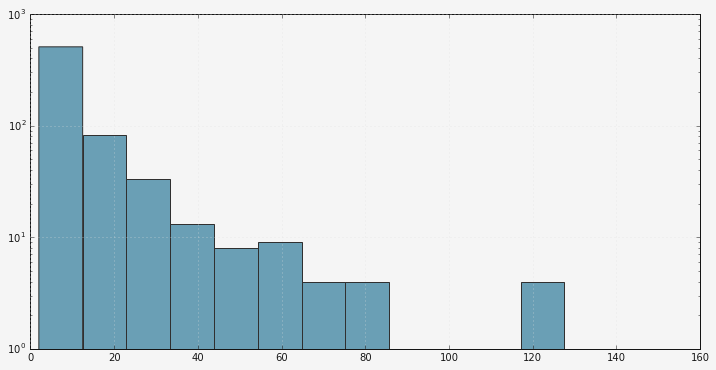

In [37]:
_ = ing_counts[1].hist(bins = 15, log =True)

In [178]:
with open('./data/first_ing_flav_dict.pkl', 'w') as f:
    pickle.dump(ing_flav_dict, f)

In [37]:
flav_ing_series =pd.Series(ing_flav_dict)

In [44]:
sorted(raw_flav_ing.keys())

['(+/-)-3-(METHYLTHIO)HEPTANAL',
 '(+/-)-ETHYL 3-HYDROXY-2-METHYLBUTYRATE',
 '(+/-)-[R-(E)]-5-ISOPROPYL-8-METHYLNONA-6,8-DIEN-2-ONE',
 '(+/\xe2\x80\x93) 2-METHYL-1-BUTANOL',
 '(+/\xe2\x80\x93)-(2,6,6-TRIMETHYL-2-HYDROXYCYCLOHEXYLIDENE) ACETIC ACID \xce\xb3-LACTONE',
 '(+/\xe2\x80\x93)-DIHYDROFARNESOL',
 '(+/\xe2\x80\x93)-ETHYL 3-ACETOXY-2-METHYLBUTYRATE',
 '(+/\xe2\x80\x93)-METHYL 5-ACETOXYHEXANOATE',
 '(+/\xe2\x80\x93)-cis- and trans-3,5-DIETHYL-1,2,4-TRITHIOLANE',
 '(+/\xe2\x80\x93)2-MERCAPTO-2-METHYLPENTAN-1-OL',
 '(E)-2-(2-OCTENYL)CYCLOPENTANONE',
 '(E)-2-DECENOIC ACID',
 '(E)-2-HEXENYL BUTYRATE',
 '(E)-2-HEXENYL ISOVALERATE',
 '(E)-2-HEXENYL PROPIONATE',
 '(E)-2-HEXENYL VALERATE',
 '(E)-2-NONENOIC ACID',
 '(E)-3,7-DIMETHYL-1,5,7-OCTATRIEN-3-OL',
 '(E)-3-(Z)-6-NONADIEN-1-OL',
 '(E)-6-METHYL-3-HEPTEN-2-ONE',
 '(E)-7-METHYL-3-OCTEN-2-ONE',
 '(E,E)-2,4-DECADIEN-1-OL',
 '(E,E)-2,4-HEXADIENOIC ACID',
 '(E,E)-3,5-OCTADIEN-2-ONE',
 '(E,Z)-2,6-NONADIEN-1-OL ACETATE',
 '(Z)-3 and (E)-2-HEXE

In [53]:
raw_flav_ing.keys()

['EUGENYL METHYL ETHER',
 '\xce\xb1-DAMASCONE',
 'BUTYL ETHYL DISULFIDE',
 'METHYL ISOPENTYL DISULFIDE',
 '10-UNDECENOIC ACID',
 'ISOBUTYRALDEHYDE',
 '2-HEXENAL',
 '2-PENTANONE',
 '4-ACETYL-2-METHYLPYRIMIDINE',
 'BUTYLATED HYDROXYTOLUENE',
 'PROPYL PHENYLACETATE',
 'ETHYL trans-2-DECENOATE',
 'BORNYL FORMATE',
 '2-OXOBUTYRIC ACID',
 '5- and 6-DECENOIC ACID',
 '3-NONANONE',
 '2-OCTENAL',
 'ALLYL PROPYL DISULFIDE',
 'ALLYL CROTONATE',
 '2-PENTENAL',
 '3-METHYL-1-BUTANETHIOL',
 '3,5- and 3,6-DIMETHYL-2-ISOBUTYLPYRAZINE',
 '3-(5-METHYL-2-FURYL)BUTANAL',
 'METHYL HEPTANOATE',
 'ETHYL 2-ETHYLBUTYRATE',
 'LINALOE WOOD OIL',
 'LINALYL ANTHRANILATE',
 '2-PHENYLPROPYL BUTYRATE',
 '4-METHYL-2-PENTENAL',
 '(+/\xe2\x80\x93)-cis- and trans-3,5-DIETHYL-1,2,4-TRITHIOLANE',
 'METHYL 1-PROPENYL DISULFIDE',
 '3-METHYLBUTYL-2-METHYLPROPANOATE',
 '4-(METHYLTHIO)-2-OXOBUTANOIC ACID',
 'o-(METHYLTHIO)PHENOL',
 'METHYL 4-PENTENOATE',
 'HEPTYL FORMATE',
 'N1-(2,4-DIMETHOXYBENZYL)-N2-(2-(PYRIDIN-2-YL)ETHYL)OXAL

In [39]:
st1 = raw_flav_ing['3-HEXANONE']

In [40]:
st2 = raw_flav_ing['1-HEXANETHIOL']

In [49]:
raw_flav_ing['2-HEXENAL']

['black currants',
 'peach',
 'pineapple',
 'fried potato',
 'Parmesan cheese',
 'butter',
 'milk',
 'eggs',
 'beef',
 'fried pork',
 'beer',
 'rum',
 'cocoa',
 'coffee',
 'filberts',
 'pas-sion fruit',
 'plumcot',
 'rose apple',
 'mango',
 'lemon balm',
 'crab']

In [140]:
split_seq = ['Reported found in', 'Also reported found in', 'and', ',']
t3 = t1.split(split_seq[0])[0].split('and') + t1.split(split_seq[0])[1].split('and')

In [151]:
t4 = map(lambda x:x.split(','), t3)
[item for sublist in t4 for item in sublist]

['',
 ' coffee ',
 '',
 ' as a component in the volatile by-product developed during the catalytic hydro-genation of soybean oil using Ni catalysts; in the scent of green vegetable Nezara viridula  Also reported found in lime peel oil',
 ' black currants',
 ' peach',
 ' pineapple',
 ' fried potato',
 ' Parmesan cheese',
 ' butter',
 ' milk',
 ' eggs',
 ' beef',
 ' fried pork',
 ' beer',
 ' rum',
 ' cocoa',
 ' coffee',
 ' filberts',
 ' pas-sion fruit',
 ' plumcot',
 ' rose apple',
 ' mango',
 ' lemon balm',
 ' crab',
 ' Cape gooseberry ',
 ' sweet grass oil']

In [194]:
def extract_ingredients(raw_ing_string):
    split_seq = ['reported found in', 'reported  found  in', 'also reported found in', ' and ', ',']
    ingr_list = [raw_ing_string.lower()]
    for term in split_seq:
        nested_list = map(lambda x: x.split(term), ingr_list)
        ingr_list = [i.strip() for sublist in nested_list for i in sublist if i]
    return ingr_list

In [201]:
test = raw_flav_ing['ISOBUTYL BUTYRATE']
print test
extract_ingredients(test)

Reported  found  in  apricot,  banana,  apple,  strawberry,  blue  and  Gruyere  cheeses,  cognac,  port  wine,  rum, honey, olive, passion fruit, plum, beans, mushrooms, mango, apple brandy, quince, cherimoya, kiwifruit and Chinese quince peel


['apricot',
 'banana',
 'apple',
 'strawberry',
 'blue',
 'gruyere  cheeses',
 'cognac',
 'port  wine',
 'rum',
 'honey',
 'olive',
 'passion fruit',
 'plum',
 'beans',
 'mushrooms',
 'mango',
 'apple brandy',
 'quince',
 'cherimoya',
 'kiwifruit',
 'chinese quince peel']